## Google Play Store Analysis
#### This dataset about details of the applications on Google Play. There are 13 features described a given app

I will find out some valuable insights from this dataset by answering these questions:
- Which category has **the highest share of apps in the market**?
- Do any apps perform **really good or really bad**?
- What's **difference between App ratings** across all categories?
- How do app sizes impact the app rating? **Light or Bulky?**
- How do app prices impact app rating? **Free or Paid?**
- Are **paid apps downloaded as much as free apps**?
- How do **the sizes of paid apps and free apps vary**?
- **Exploring Correlations**

Source data: Kaggle

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.show()
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})
import plotly
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as pyo
pyo.init_notebook_mode()

In [2]:
df = pd.read_csv('googleplaystore.csv')
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [3]:
import sys
!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="GG Play Store Apps", explorative=True)

In [4]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.drop_duplicates(subset='App', inplace=True)

In [7]:
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

In [8]:
len(df)

9659

## Data Cleaning
 - Convert all app sizes to MB
 - Remove '+' from 'Number of Installs' to make it numeric
 - Convert all review text to English language using Google Translator library

In [9]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size  Installs  Type Price  \
0         4.1     159                 19M     10000  Free     0   
1         3.9     967                 14M    500000  Free     0   
2         4.7   87510                8.7M   5000000  Free     0   
3         4.5  215644                 25M  50000000  Free     0   
4         4.3     967                2.8M    100000  Free     0   
...       ...     ...                 ...       ...   ...   ...   
10836     4.5      38                 53M      5000  Free     0   
10837     5.0       4                3.6M       100  Free     0   
10838     NaN       3                9.5M      1000  Free     0   
10839     4.5     114  Varies with device      1000  Free     0   
10840     4.5  398307                 19M  10000000  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9659 rows x 13 columns]

In [10]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [11]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 9659, dtype: float64

In [12]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [13]:
df[df['Price'] !=0]['Price']

234       4.99
235       4.99
427       3.99
476       3.99
477       6.99
         ...  
10735     0.99
10760     7.99
10782    16.99
10785     1.20
10798     1.04
Name: Price, Length: 756, dtype: float64

In [14]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [54]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [55]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna().astype('float')
t = df['Type'].dropna()
price = df['Price']

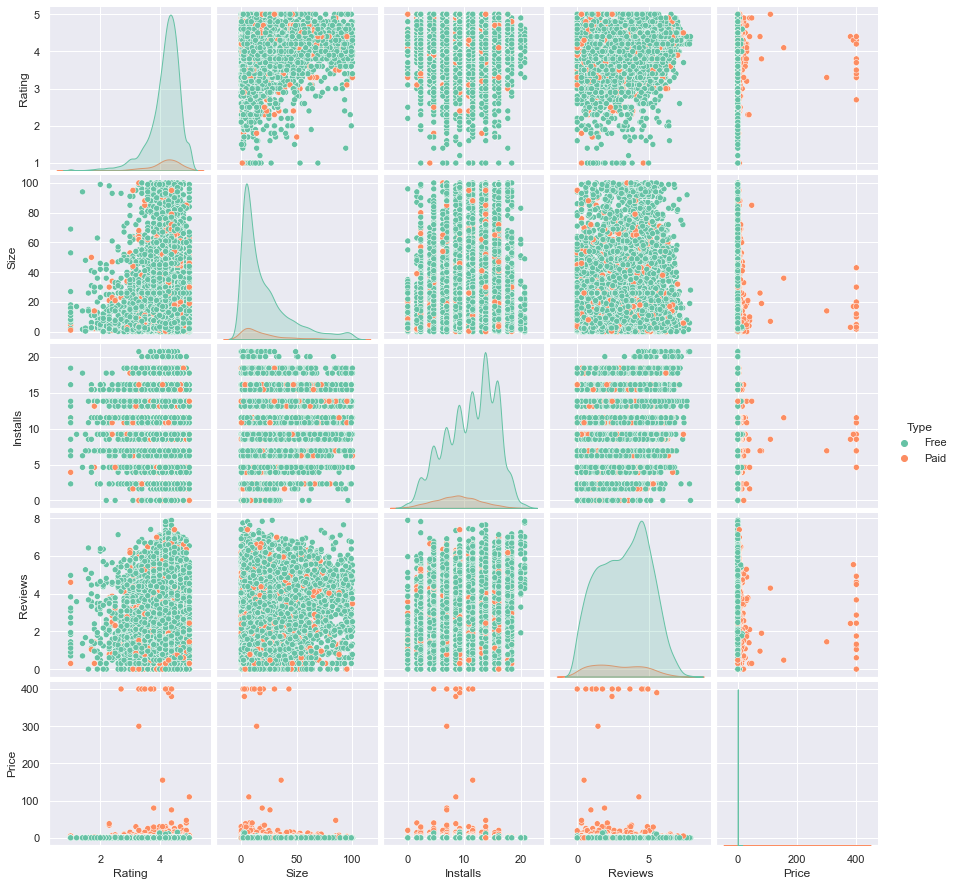

In [56]:
sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

## Android market breakdown

Which category has the highest share of apps in the market?

In [17]:
number_of_apps = df['Category'].value_counts().sort_values(ascending=True)
number_of_apps

BEAUTY                   53
COMICS                   56
PARENTING                60
ART_AND_DESIGN           64
EVENTS                   64
HOUSE_AND_HOME           74
WEATHER                  79
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        85
ENTERTAINMENT           102
FOOD_AND_DRINK          112
EDUCATION               119
MAPS_AND_NAVIGATION     131
VIDEO_PLAYERS           163
DATING                  171
SHOPPING                202
TRAVEL_AND_LOCAL        219
BOOKS_AND_REFERENCE     222
SOCIAL                  239
NEWS_AND_MAGAZINES      254
PHOTOGRAPHY             281
HEALTH_AND_FITNESS      288
COMMUNICATION           315
SPORTS                  325
FINANCE                 345
LIFESTYLE               369
PRODUCTIVITY            374
PERSONALIZATION         376
MEDICAL                 395
BUSINESS                420
TOOLS                   827
GAME                    959
FAMILY                 1832
Name: Category, dtype: int64

In [18]:
import plotly.graph_objs as go
data1 = [go.Pie(
        labels = number_of_apps.index,
        values = number_of_apps.values,
        hoverinfo = 'label+value'
    
)]

In [19]:
plotly.offline.iplot(data1)

- **Family** and **Game** apps have the highest market prevelance. 
- Interestingly, **Tools, Business and Medical** apps are also catching up.

## Average rating of apps

Do any apps perform really good or really bad?

In [20]:
data2 = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df['Rating']))
plotly.offline.iplot(data2)

Average app rating =  4.173243045387998


Most apps do well with an average rating of **4.17**

## App ratings across categories

In [21]:
import scipy.stats as stats
f = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Rating'].dropna(), 
               df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
               df.loc[df.Category == 'GAME']['Rating'].dropna(),
               df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
               df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
               df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
               df.loc[df.Category == 'EDUCATION']['Rating'].dropna(),
               df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
               df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
               df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna()
              )

print(f)

F_onewayResult(statistic=12.79263715618054, pvalue=2.323280446259348e-20)


- The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis
- The average app ratings across categories is significantly different.

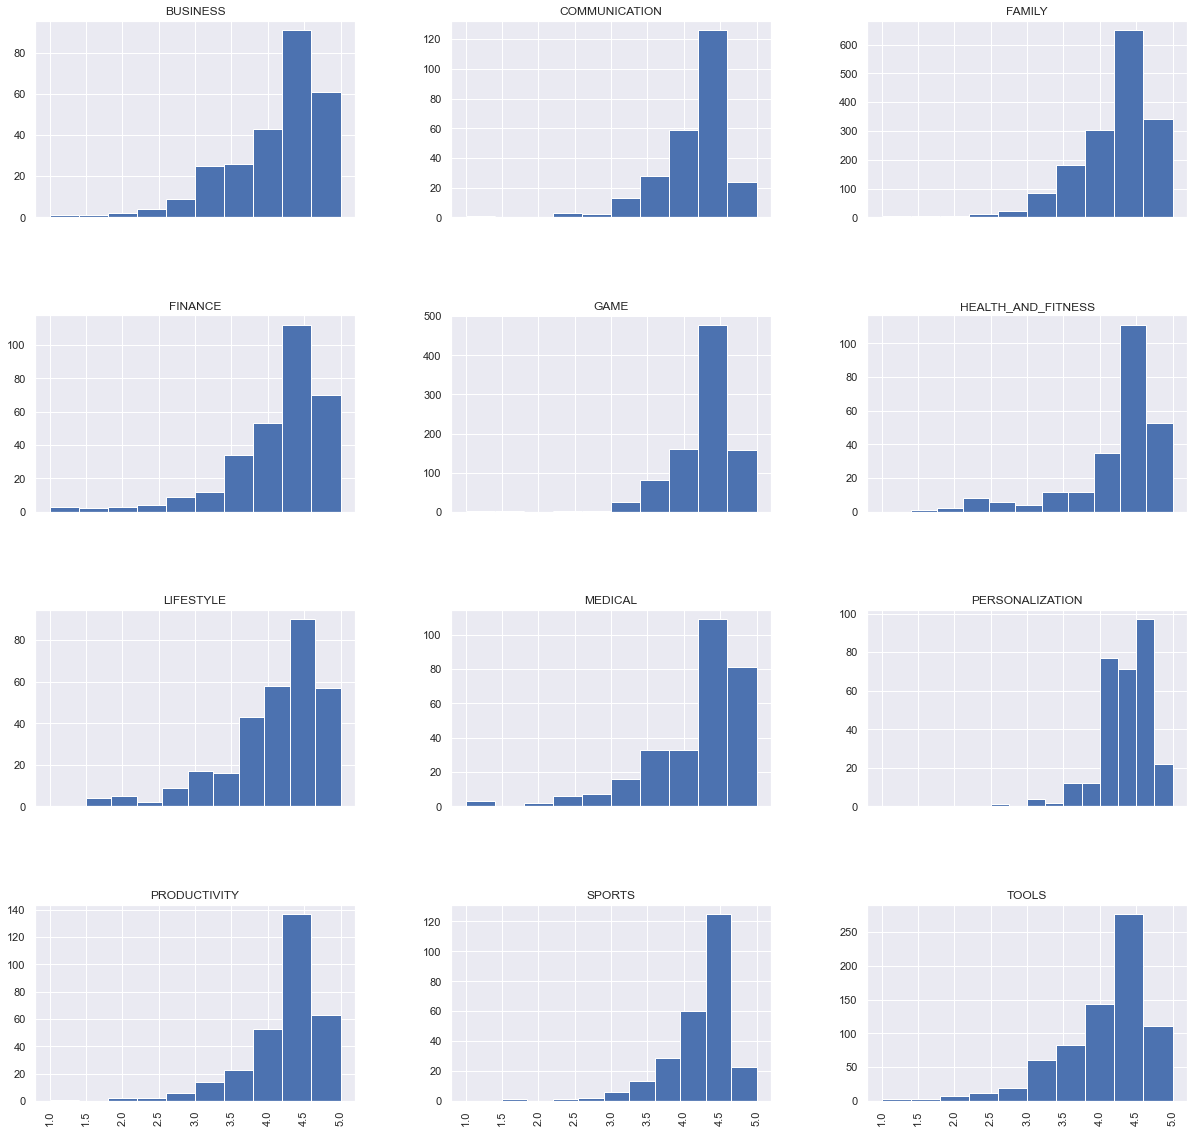

In [53]:
groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

## Sizing Strategy
How do app sizes impact the app rating?

In [23]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

In [24]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'])

Most top rated apps are optimally sized between **~2MB to ~40MB** - neither too light nor too heavy

## Pricing Strategy
How do app prices impact app rating?

In [25]:
paid_apps = df[df.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

Most top rated apps are optimally priced between 1\\$ to 30\\$ . There are only a very few apps priced above 20\$.

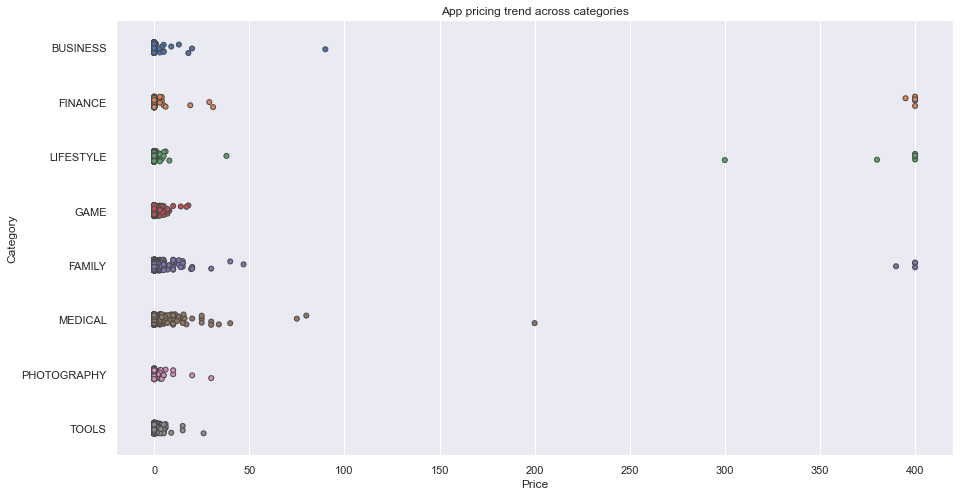

In [52]:
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')

In [27]:
df[['Category', 'App']][df.Price > 200]

Category                                App
4197     FAMILY             most expensive app (H)
4362  LIFESTYLE                         💎 I'm rich
4367  LIFESTYLE           I'm Rich - Trump Edition
5351  LIFESTYLE                          I am rich
5354     FAMILY                     I am Rich Plus
5355  LIFESTYLE                      I am rich VIP
5356    FINANCE                  I Am Rich Premium
5357  LIFESTYLE                I am extremely Rich
5358    FINANCE                         I am Rich!
5359    FINANCE                 I am rich(premium)
5362     FAMILY                      I Am Rich Pro
5364    FINANCE     I am rich (Most expensive app)
5366     FAMILY                          I Am Rich
5369    FINANCE                          I am Rich
5373    FINANCE                 I AM RICH PRO PLUS
9917    FINANCE                        Eu Sou Rico
9934  LIFESTYLE  I'm Rich/Eu sou Rico/أنا غني/我很有錢

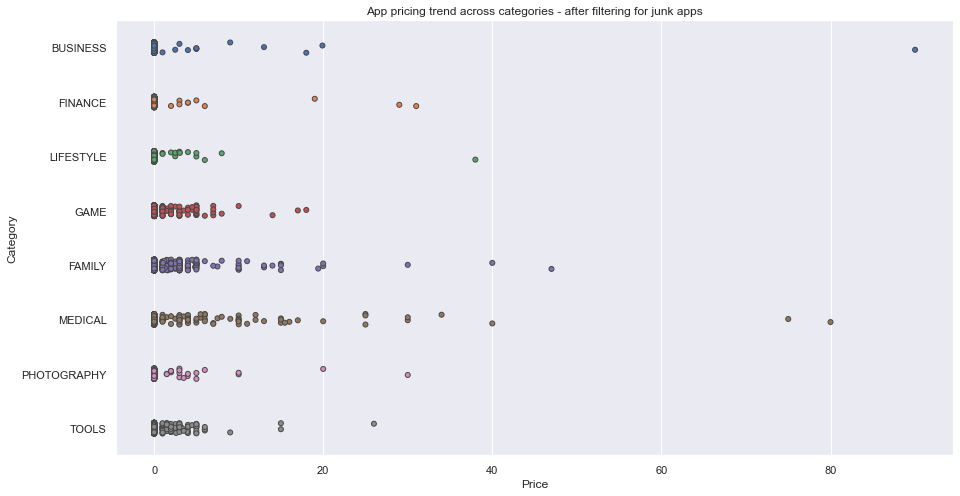

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.Price<100]
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

- Clearly, **Medical and Family apps** are the most expensive. Some medical apps extend even up to 80\$.


- All other apps are priced under 30\$.


- Surprisingly, **all game apps are reasonably priced below 20\$.**

## Are paid apps downloaded as much as free apps?

In [29]:
trace0 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Paid apps have a relatively lower number of downloads than free apps

In [30]:
temp_df = df[df.Type == 'Paid']
temp_df = temp_df[temp_df.Size > 5]

data = [{
    'x' : temp_df['Rating'],
    'type':'scatter',
    'y' : temp_df['Size'],
    'mode' : 'markers',
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

- **Majority of the paid apps that are highly rated have small sizes.** This means that most paid apps are designed and developed to serve specific functionalities and hence are not bulky.


- **Users prefer to pay for apps that are light-weighted.** A paid app that is bulky may not perform well in the market.

In [31]:
p =sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

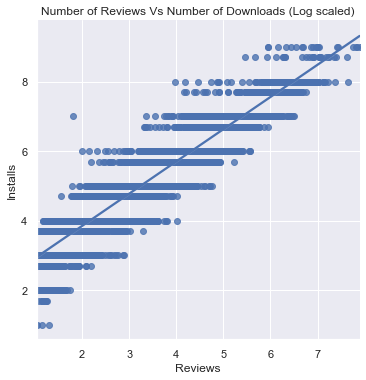

In [50]:
df_copy = df.copy()
df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

**A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads.** This means that customers tend to download a given app more if it has been reviewed by a larger number of people. 

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

In [33]:
review_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [36]:
merged_df = pd.merge(df, review_df, on = 'App', how = 'inner')

In [37]:
merged_df.head()

App        Category  Rating  Reviews  Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
3  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
4  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   

   Price Content Rating                     Genres      Last Updated  \
0    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
3    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
4    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   

  Current Ver   Android Ver  \
0       2.0.0  4.0.3 and up   
1       2.0.0  4.0.3 and up   
2       2.0.0  4.0.3 and up   
3       2.0.0  4.0.3 and up   
4       2.0.0  4.0.3 and up   

                                   Translated_Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   
3                                                NaN       NaN   
4                           I love colors inspyering  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000  
3                 NaN                     NaN  
4               0.500                0.600000

In [38]:
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_category_count

Category Sentiment  App
0      ART_AND_DESIGN  Negative   61
1      ART_AND_DESIGN   Neutral   62
2      ART_AND_DESIGN  Positive  259
3   AUTO_AND_VEHICLES  Negative   17
4   AUTO_AND_VEHICLES   Neutral   36
..                ...       ...  ...
94      VIDEO_PLAYERS   Neutral   58
95      VIDEO_PLAYERS  Positive  190
96            WEATHER  Negative   28
97            WEATHER   Neutral   31
98            WEATHER  Positive  142

[99 rows x 3 columns]

In [39]:
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
grouped_sentiment_category_sum

Category  Sentiment
0        ART_AND_DESIGN        382
1     AUTO_AND_VEHICLES        289
2                BEAUTY        338
3   BOOKS_AND_REFERENCE        651
4              BUSINESS       1082
5                COMICS         46
6         COMMUNICATION       1024
7                DATING       1715
8             EDUCATION        847
9         ENTERTAINMENT       1264
10               EVENTS        158
11               FAMILY       2009
12              FINANCE       1435
13       FOOD_AND_DRINK        638
14                 GAME       6678
15   HEALTH_AND_FITNESS       2250
16       HOUSE_AND_HOME        511
17   LIBRARIES_AND_DEMO        333
18            LIFESTYLE        954
19  MAPS_AND_NAVIGATION        192
20              MEDICAL       1400
21   NEWS_AND_MAGAZINES       1040
22            PARENTING        260
23      PERSONALIZATION       1004
24          PHOTOGRAPHY       1177
25         PRODUCTIVITY       1463
26             SHOPPING        899
27               SOCIAL        741
28               SPORTS       1479
29                TOOLS       1451
30     TRAVEL_AND_LOCAL       1692
31        VIDEO_PLAYERS        331
32              WEATHER        201

In [40]:
new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])
new_df

Category Sentiment_x  App  Sentiment_y
0      ART_AND_DESIGN    Negative   61          382
1      ART_AND_DESIGN     Neutral   62          382
2      ART_AND_DESIGN    Positive  259          382
3   AUTO_AND_VEHICLES    Negative   17          289
4   AUTO_AND_VEHICLES     Neutral   36          289
..                ...         ...  ...          ...
94      VIDEO_PLAYERS     Neutral   58          331
95      VIDEO_PLAYERS    Positive  190          331
96            WEATHER    Negative   28          201
97            WEATHER     Neutral   31          201
98            WEATHER    Positive  142          201

[99 rows x 4 columns]

In [41]:
new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df

Category Sentiment_x  App  Sentiment_y  Sentiment_Normalized
0      ART_AND_DESIGN    Negative   61          382              0.159686
1      ART_AND_DESIGN     Neutral   62          382              0.162304
2      ART_AND_DESIGN    Positive  259          382              0.678010
3   AUTO_AND_VEHICLES    Negative   17          289              0.058824
4   AUTO_AND_VEHICLES     Neutral   36          289              0.124567
..                ...         ...  ...          ...                   ...
94      VIDEO_PLAYERS     Neutral   58          331              0.175227
95      VIDEO_PLAYERS    Positive  190          331              0.574018
96            WEATHER    Negative   28          201              0.139303
97            WEATHER     Neutral   31          201              0.154229
98            WEATHER    Positive  142          201              0.706468

[99 rows x 5 columns]

In [42]:
list(new_df.Category[::3])

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER']

In [43]:
trace1 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[::3],
    name='Negative',
    marker=dict(color = 'rgb(209,49,20)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[1::3],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[2::3],
    name='Positive',
    marker=dict(color = 'rgb(49,189,120)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

- **Auto & Vehicles, Comics, Events, Health and Fitness** apps perform the best, having more than **75% positive reviews**.


- On the contrary, many **Game and Social** apps perform bad leading to **50% positive and 50% negative**.

# CONCLUSION

 - Average rating of apps on Google Play Store is **4.17**.
 
 
 - **Users prefer to pay for apps that are light-weighted.** Thus, a paid app that is bulky may not perform well in the market.
 
 
 - Most of the top rated apps are **optimally sized between ~2MB to ~40MB** - neither too light nor too heavy.
 
 
 - Most of the top rated apps are **optimally priced between 1\\$ to 30\\$**
 
 
 - **Medical and Family apps are the most expensive** and even extend upto 80\$.
 
 
 - Users tend to download a given app more if it has been reviewed by a large number of people.